In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer

In [2]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
         'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']

train = pd.read_csv('data/adult.data', names=names)
test = pd.read_csv('data/adult.test', names=names)

In [3]:
print('Initial size: ', train.shape, test.shape)

Initial size:  (32561, 15) (16282, 15)


In [4]:
# show train data description 
train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# show test data description 
test.describe()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


1. in both train and test dataset, the maximum number for **captial-gain** column is **99999**, it's obviously an outlier
2. no **age** column in test.describe()

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16282 entries, 0 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16282 non-null  object 
 1   workclass       16281 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education-num   16281 non-null  float64
 5   marital-status  16281 non-null  object 
 6   occupation      16281 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital-gain    16281 non-null  float64
 11  capital-loss    16281 non-null  float64
 12  hours-per-week  16281 non-null  float64
 13  native-country  16281 non-null  object 
 14  income          16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


need to check **age** column, have one more non-null value than other columns

In [7]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [8]:
# drop the first line
test = test.iloc[1:,:]

# convert age to int type
test['age'] = test['age'].apply(pd.to_numeric)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16281 non-null  int64  
 1   workclass       16281 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education-num   16281 non-null  float64
 5   marital-status  16281 non-null  object 
 6   occupation      16281 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital-gain    16281 non-null  float64
 11  capital-loss    16281 non-null  float64
 12  hours-per-week  16281 non-null  float64
 13  native-country  16281 non-null  object 
 14  income          16281 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 1.9+ MB


In [9]:
# drop capital-gain both in train and test, where it's equal to 99999

print('before', train.shape, test.shape)

train = train[train['capital-gain'] != 99999]
test = test[test['capital-gain'] != 99999]

print('after', train.shape, test.shape)

before (32561, 15) (16281, 15)
after (32402, 15) (16196, 15)


## drop duplicates

In [10]:
# drop duplicates
train = train.drop_duplicates()
test = test.drop_duplicates()
print('After drop duplication: ', train.shape, test.shape)

After drop duplication:  (32378, 15) (16191, 15)


## remove unknow values

In [11]:
# remove unknow values
filter_income = [" >50K", " <=50K"]
filter_workclass = [' Private', ' Self-emp-not-inc', ' Self-emp-inc', ' Federal-gov', ' Local-gov', ' State-gov',
                    ' Without-pay', ' Never-worked']
filter_education = [' Bachelors', ' Some-college', ' 11th', ' HS-grad', ' Prof-school', ' Assoc-acdm', ' Assoc-voc',
                    ' 9th', ' 7th-8th', ' 12th', ' Masters', ' 1st-4th', ' 10th', ' Doctorate', ' 5th-6th', ' Preschool']
filter_marital_status = [' Married-civ-spouse', ' Divorced', ' Never-married', ' Separated', ' Widowed',
                         ' Married-spouse-absent', ' Married-AF-spouse']
filter_occupation = [' Tech-support', ' Craft-repair', ' Other-service', ' Sales', ' Exec-managerial', ' Prof-specialty',
                     ' Handlers-cleaners', ' Machine-op-inspct', ' Adm-clerical', ' Farming-fishing', ' Transport-moving',
                     ' Priv-house-serv', ' Protective-serv', ' Armed-Forces']
filter_relationship = [' Wife', ' Own-child', ' Husband', ' Not-in-family', ' Other-relative', ' Unmarried']
filter_race = [' White', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other', ' Black']
filter_sex = [' Female', ' Male']
filter_native_country = [' United-States', ' Cambodia', ' England', ' Puerto-Rico', ' Canada', ' Germany',
                         ' Outlying-US(Guam-USVI-etc)', ' India', ' Japan', ' Greece', ' South', ' China', ' Cuba',
                         ' Iran', ' Honduras', ' Philippines', ' Italy', ' Poland', ' Jamaica', ' Vietnam', ' Mexico',
                         ' Portugal', ' Ireland', ' France', ' Dominican-Republic', ' Laos', ' Ecuador', ' Taiwan',
                         ' Haiti', ' Columbia', ' Hungary', ' Guatemala', ' Nicaragua', ' Scotland', ' Thailand',
                         ' Yugoslavia', ' El-Salvador', ' Trinadad&Tobago', ' Peru', ' Hong', ' Holand-Netherlands']


In [12]:
filter1 = train.income.isin(filter_income)
filter2 = train.workclass.isin(filter_workclass)
filter3 = train.education.isin(filter_education)
filter4 = train['marital-status'].isin(filter_marital_status)
filter5 = train.relationship.isin(filter_relationship)
filter6 = train.occupation.isin(filter_occupation)
filter7 = train.race.isin(filter_race)
filter8 = train.sex.isin(filter_sex)
filter9 = train['native-country'].isin(filter_native_country)

train = train[filter1 & filter2 & filter3 & filter4 & filter5 & filter6 & filter7 & filter8 & filter9]

In [13]:
filter1 = test.income.isin([" >50K.", " <=50K."]) # different in test dataset
filter2 = test.workclass.isin(filter_workclass)
filter3 = test.education.isin(filter_education)
filter4 = test['marital-status'].isin(filter_marital_status)
filter5 = test.relationship.isin(filter_relationship)
filter6 = test.occupation.isin(filter_occupation)
filter7 = test.race.isin(filter_race)
filter8 = test.sex.isin(filter_sex)
filter9 = test['native-country'].isin(filter_native_country)

test = test[filter1 & filter2 & filter3 & filter4 & filter5 & filter6 & filter7 & filter8 & filter9]

In [14]:
print('After remove unknow values: ', train.shape, test.shape)

After remove unknow values:  (29991, 15) (14974, 15)


In [15]:
train.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [16]:
test.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.


in test dataset, the income value is different, have "." after the label

In [17]:
test['income'] = test['income'].apply(lambda x: x[:-1])
test.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K


## Checking outliers

In [18]:
continuous_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','hours-per-week']

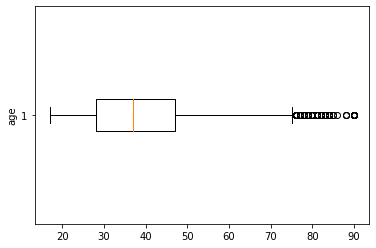

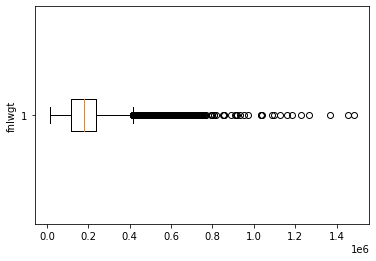

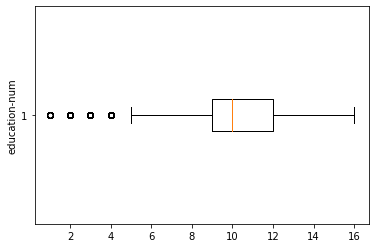

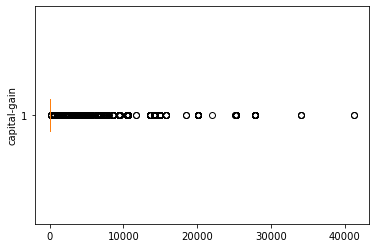

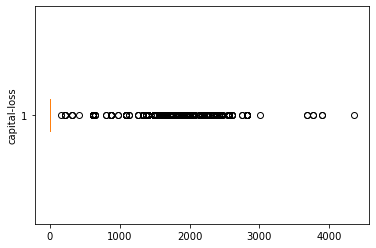

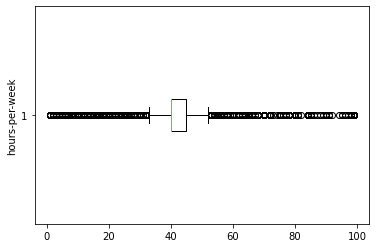

In [19]:
for feature in continuous_features:
    plt.boxplot(x = train[feature], vert=False)
    plt.ylabel(feature)
    plt.show()

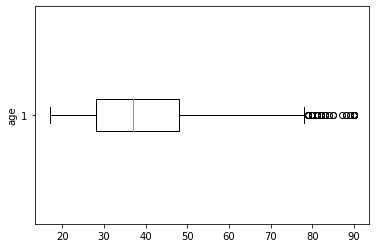

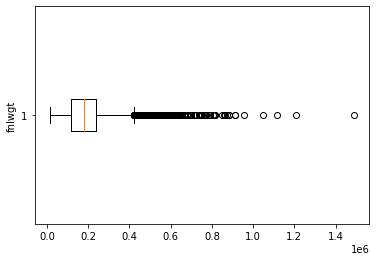

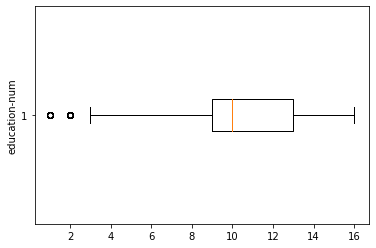

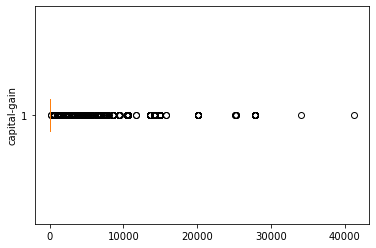

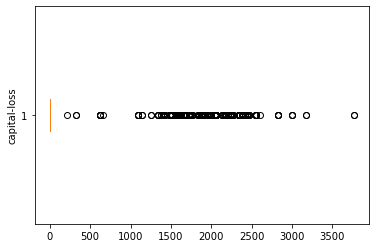

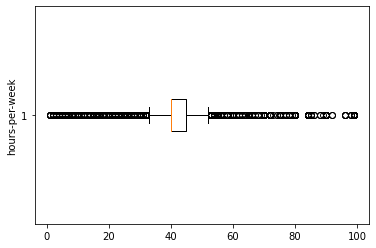

In [20]:
for feature in continuous_features:
    plt.boxplot(x = test[feature], vert=False)
    plt.ylabel(feature)
    plt.show()

##### Although it looks terrible according to the box plot, all the values are within a reasonable range and are therefore considered to still have some significance and are not processed

## Label encoding
For the categorical variables, convert them into a numeric form

In [21]:
le = LabelEncoder()
for col in train.columns:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

## Binary Splitting of Continuous Variables

In [22]:
kbd = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')
train[continuous_features] = kbd.fit_transform(train[continuous_features])
test[continuous_features] = kbd.fit_transform(test[continuous_features])

## Save data to csv

In [23]:
train.shape, test.shape

((29991, 15), (14974, 15))

In [25]:
# Probability for the label
train.income.value_counts(normalize=True)

0    0.75466
1    0.24534
Name: income, dtype: float64

In [27]:
test.income.value_counts(normalize=True)

0    0.758314
1    0.241686
Name: income, dtype: float64

In [24]:
train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)